Offensive sentence detection in Malayalam

In [4]:
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 75

In [5]:
df = pd.read_csv('data.csv')

In [6]:
label_encoder = LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([0, 2, 3, 1])

In [7]:
# Splitting the dataset into test/train datasets
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size = 0.20, shuffle=True, random_state=42)

In [8]:
def classify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    

    lr =  LogisticRegression(solver= 'liblinear', penalty='l1', C = 100, max_iter = 300)
    lr.fit(tfidf_train, y_train)

    y_pred = lr.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2426
           1       0.62      0.17      0.27        29
           2       0.22      0.06      0.10        33
           3       0.26      0.14      0.19        35

    accuracy                           0.96      2523
   macro avg       0.52      0.34      0.38      2523
weighted avg       0.94      0.96      0.95      2523



/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


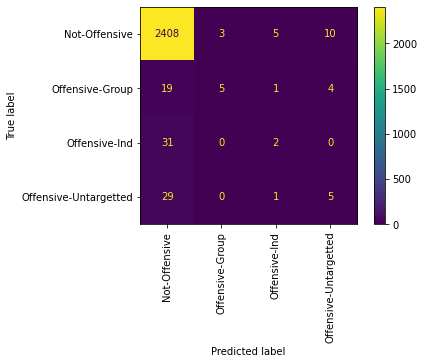

In [9]:
classify(X_train, X_test, y_train, y_test)

In [10]:
from xgboost import XGBClassifier

In [13]:
def xgclassify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    
 #xg =  XGBClassifier(eta=0.2, min_child_weight=50, subsample =0.8, alpha=500)
    xg =  XGBClassifier(max_depth= 9, subsample =0.75)
    xg.fit(tfidf_train, y_train)

    y_pred = xg.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2426
           1       0.33      0.10      0.16        29
           2       0.00      0.00      0.00        33
           3       0.33      0.14      0.20        35

    accuracy                           0.96      2523
   macro avg       0.41      0.31      0.33      2523
weighted avg       0.94      0.96      0.95      2523



/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

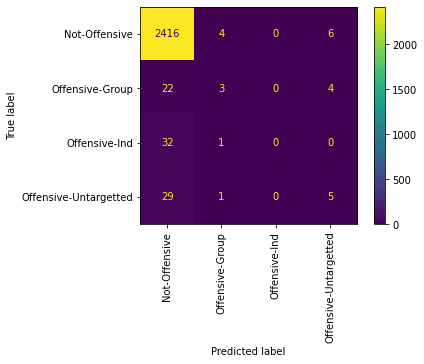

In [14]:
xgclassify(X_train, X_test, y_train, y_test)